Loading the trained model, scaler, and history...
All artifacts loaded successfully.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.28      0.42        61
    Diabetes       0.46      0.93      0.62        41

    accuracy                           0.54       102
   macro avg       0.66      0.60      0.52       102
weighted avg       0.69      0.54      0.50       102


Confusion Matrix:
[[17 44]
 [ 3 38]]

Generating visualizations...


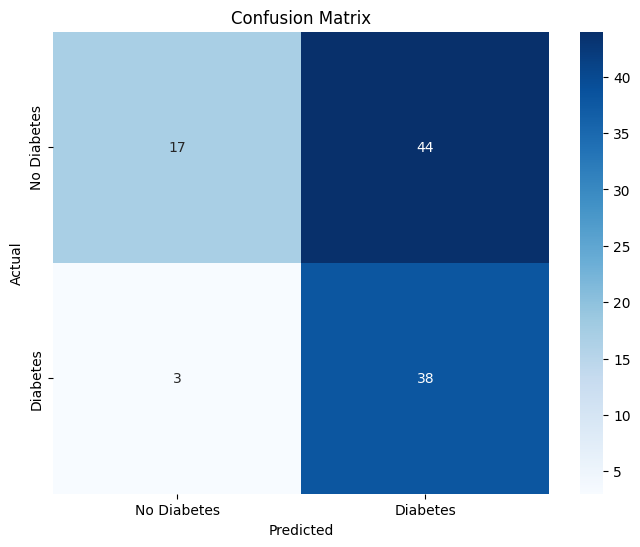

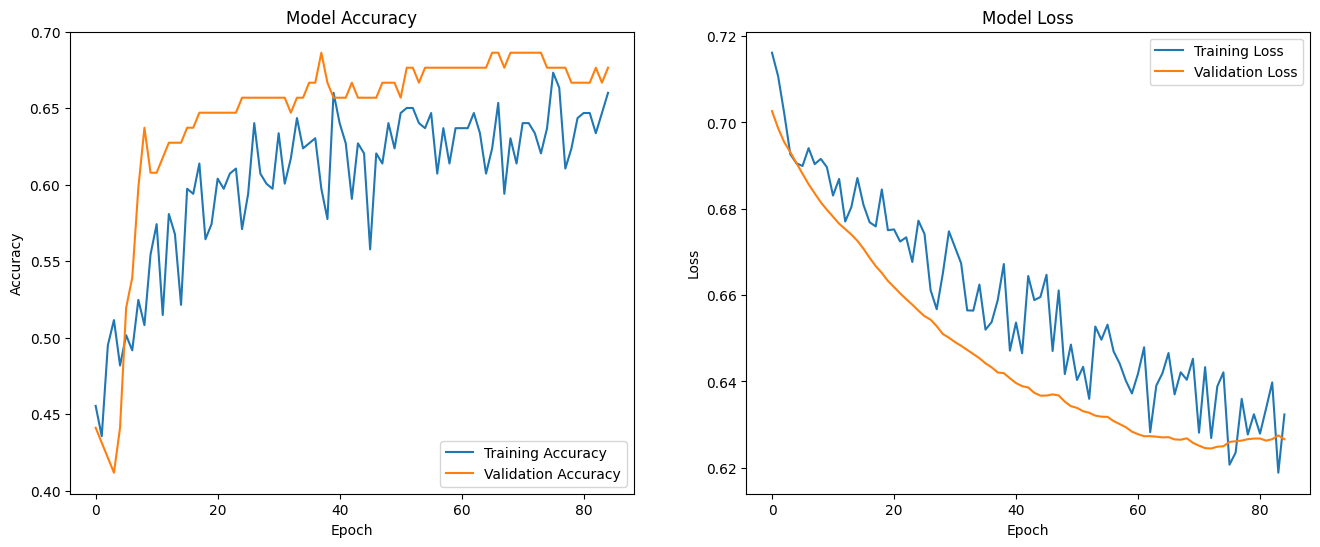


Evaluation script finished.


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import os

# --- Step 1: Load All Saved Artifacts ---
MODEL_FILE = 'diabetes_model.keras'
SCALER_FILE = 'scaler.joblib'
HISTORY_FILE = 'training_history.csv'

if not all(os.path.exists(f) for f in [MODEL_FILE, SCALER_FILE, HISTORY_FILE]):
    print("Error: One or more required files are missing (model, scaler, or history).")
    print("Please run the 'train_model.py' script first to create all necessary files.")
else:
    print("Loading the trained model, scaler, and history...")
    model = tf.keras.models.load_model(MODEL_FILE)
    scaler = joblib.load(SCALER_FILE)
    history_df = pd.read_csv(HISTORY_FILE)
    print("All artifacts loaded successfully.")

    # --- Step 2: Load and Prepare Test Data ---
    file_name = '/content/preprocessed_diabetes_data.csv'
    df = pd.read_csv(file_name)
    y = df['Diabetes_Diagnosis']
    X = df.drop('Diabetes_Diagnosis', axis=1)
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Step 3: Scale Test Data ---
    columns_to_scale = ['Age', 'BMI']
    X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    # --- Step 4: Generate Predictions ---
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.3).astype("int32")

    # --- Step 5: Display Metrics ---
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # --- Step 6: Visualize Metrics and Learning Curves ---
    print("\nGenerating visualizations...")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot Learning Curves (This section is now restored)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(history_df['accuracy'], label='Training Accuracy')
    ax1.plot(history_df['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    ax2.plot(history_df['loss'], label='Training Loss')
    ax2.plot(history_df['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')
    plt.show()

    print("\nEvaluation script finished.")